In [1]:
#import all the required packages to train the model
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading and loading the dataset
df = pd.read_csv(r'C:\Users\Varshith\OneDrive\Documents\codsoft\sms spam\spam.csv', encoding='latin1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
#step1:-Data Cleaning or Data Processing
#we will see structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#drop the duplicates
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#rename the columns of the dataset
df.rename(columns={'v1':'Spam or Ham','v2':'Message'},inplace = True)
df.head()

,Spam or Ham,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
lbr = LabelEncoder()
df['Spam or Ham'] = lbr.fit_transform(df['Spam or Ham'])
df.head()

,Spam or Ham,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#let us know missing values or null values
print(df.isnull().sum())
print()
print("number of duplicates: ",df.duplicated().sum())

Spam or Ham    0
Message        0
dtype: int64

number of duplicates:  403


In [9]:
#drop duplicates 
df = df.drop_duplicates()
print("number of duplicates: ",df.duplicated().sum())
print("df.shape: ",df.shape)

number of duplicates:  0
df.shape:  (5169, 2)


In [10]:
#step 2:Exploratory data analysis
target_counts = df['Spam or Ham'].value_counts()
target_counts

0    4516
1     653
Name: Spam or Ham, dtype: int64

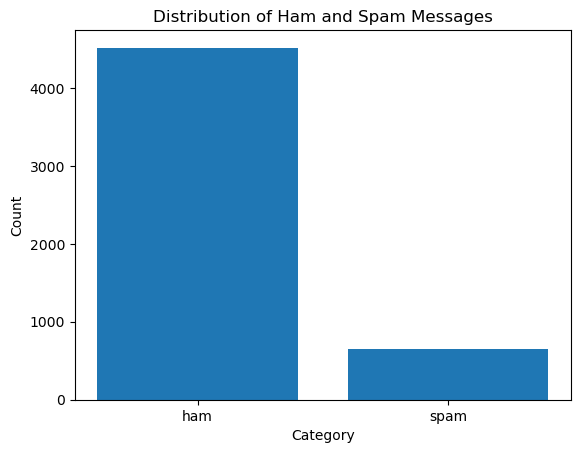

In [11]:
plt.bar(target_counts.index, target_counts.values, tick_label=['ham', 'spam'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam Messages')
plt.show()

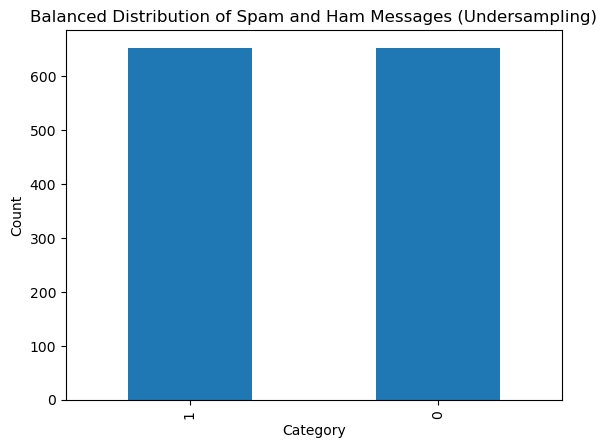

In [12]:
#let us balance the data set using under sampling technique
spam = df[df['Spam or Ham'] == 1]
ham = df[df['Spam or Ham'] == 0]

# Undersample the majority class (ham)
ham_balanced = ham.sample(spam.shape[0], random_state=42)
df_balanced = pd.concat([spam, ham_balanced])

# Visualize the balanced class distribution
df_balanced['Spam or Ham'].value_counts().plot(kind="bar")
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Balanced Distribution of Spam and Ham Messages (Undersampling)')
plt.show()

In [13]:
#adding some more required columns which helps the model to deeply understand the classification between the spam and ham message
#here we are using the nlp techniques
#adding a column that consists the number of characters in the message
import nltk
df_balanced['num_of_characters'] = df['Message'].apply(len)
df_balanced.head()

,Spam or Ham,Message,num_of_characters
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [14]:
#adding a column that consists the number of words
df_balanced['num_of_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df_balanced.head()

,Spam or Ham,Message,num_of_characters,num_of_words
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
8,1,WINNER!! As a valued network customer you have...,158,32
9,1,Had your mobile 11 months or more? U R entitle...,154,31
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31


In [15]:
#adding an other column that consists the number of sentences
df_balanced['num_of_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df_balanced.head()

,Spam or Ham,Message,num_of_characters,num_of_words,num_of_sentences
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3


In [16]:
#visualizing the statstical data of the newly formed columns
df_balanced[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,1306.000000,1306.000000,1306.000000
mean,103.880551,22.358346,2.383614
std,57.113582,12.097506,1.523962
min,2.000000,1.000000,1.000000
25%,48.250000,12.000000,1.000000
50%,115.000000,24.000000,2.000000
75%,152.000000,30.000000,3.000000
max,588.000000,154.000000,16.000000


C:\Users\Varshith\AppData\Local\Temp\ipykernel_25160\1264215334.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_balanced.corr(),annot=True)


<Axes: >

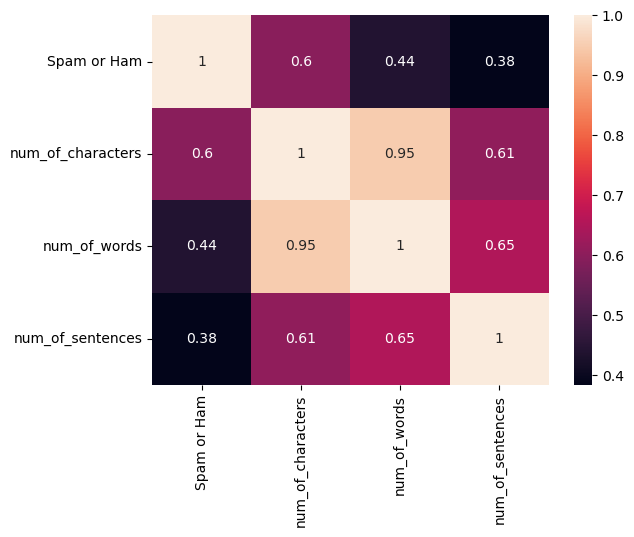

In [17]:
#generating the corelation heat map
sns.heatmap(df_balanced.corr(),annot=True)

In [18]:
#Step3: Text Processing
#a function that converts to lower case and removing the stopwords
import string
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_Message(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message) 
    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)
    Message = y[:]
    y.clear()
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)            
    Message = y[:]
    y.clear()
    for i in Message:
        y.append(ps.stem(i))
    return " ".join(y)

In [19]:
#adding a new column that is an improvised version of the original message
df_balanced['transformed_message'] = df_balanced['Message'].apply(transform_Message)
df_balanced.head()

,Spam or Ham,Message,num_of_characters,num_of_words,num_of_sentences,transformed_message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...


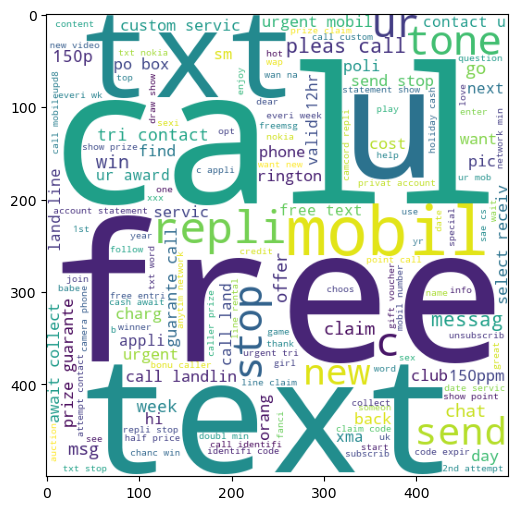

In [22]:
#building a wordcloud for the spam outcomes
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df_balanced[df_balanced['Spam or Ham'] == 1]['transformed_message'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

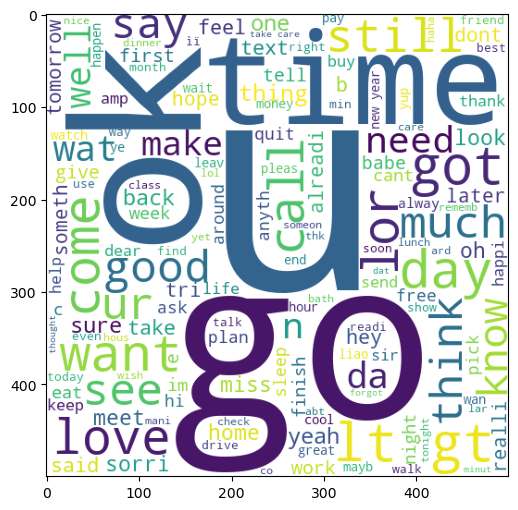

In [23]:
#building a wordcloud for the ham outcomes
ham_wc = wc.generate(df_balanced[df_balanced['Spam or Ham'] == 0]['transformed_message'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [26]:
#knowing the length of spam corpus
spam_corpus = []
for msg in df_balanced[df_balanced['Spam or Ham'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

9939

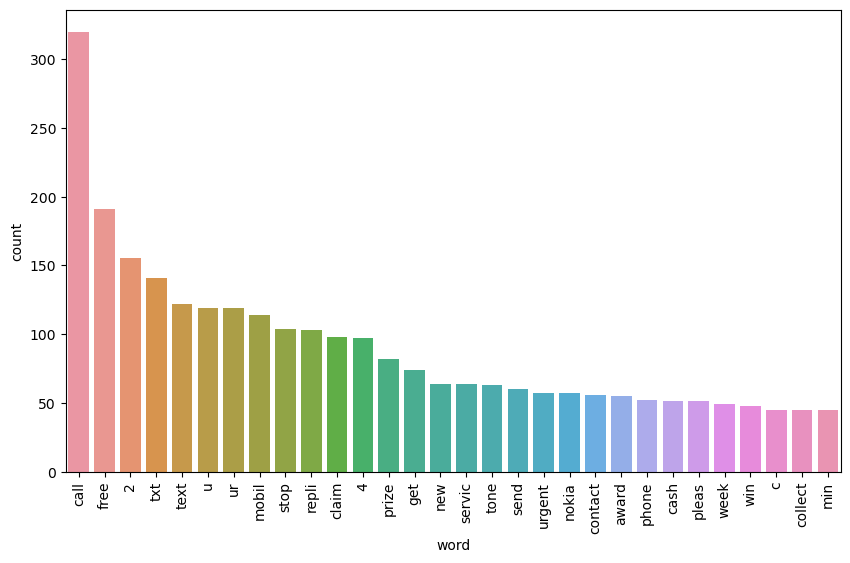

In [28]:
from collections import Counter
spam_word_counts = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
spam_df = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [29]:
#knowing the ham corpus
ham_corpus = []
for msg in df_balanced[df_balanced['Spam or Ham'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

5094

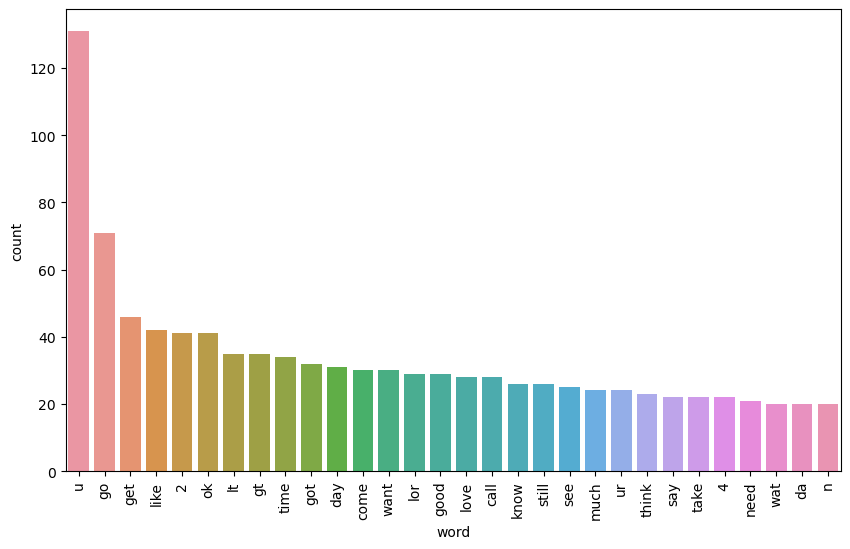

In [30]:
ham_word_counts = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
ham_df = pd.DataFrame(ham_word_counts, columns=['word', 'count'])

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=ham_df)
plt.xticks(rotation='vertical')
plt.show()

In [35]:
#step4:Model Building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df_balanced['transformed_message']).toarray()
y = df_balanced['Spam or Ham'].values

In [38]:
#prerequistics of model training
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print("X_train shape ",X_train.shape)
print("X_test shape ",X_test.shape)
print("y_train shape ",Y_train.shape)
print("y_test shape ",Y_test.shape)

X_train shape  (1044, 3000)
X_test shape  (262, 3000)
y_train shape  (1044,)
y_test shape  (262,)


In [43]:
#train the model
#we are random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [45]:
#caluculating the metrics of the developed and trained random forest model
#1st calculating the accuracy of the model
from sklearn import metrics
acc = metrics.accuracy_score(Y_test,y_pred)
print(f"Accuracy of the model: {acc*100:.2f}%")

Accuracy of the model: 95.42%


In [46]:
#2nd calculating the classification report
report = metrics.classification_report(Y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       132
           1       0.99      0.92      0.95       130

    accuracy                           0.95       262
   macro avg       0.96      0.95      0.95       262
weighted avg       0.96      0.95      0.95       262



Confusion_matrix: 
[[131   1]
 [ 11 119]]



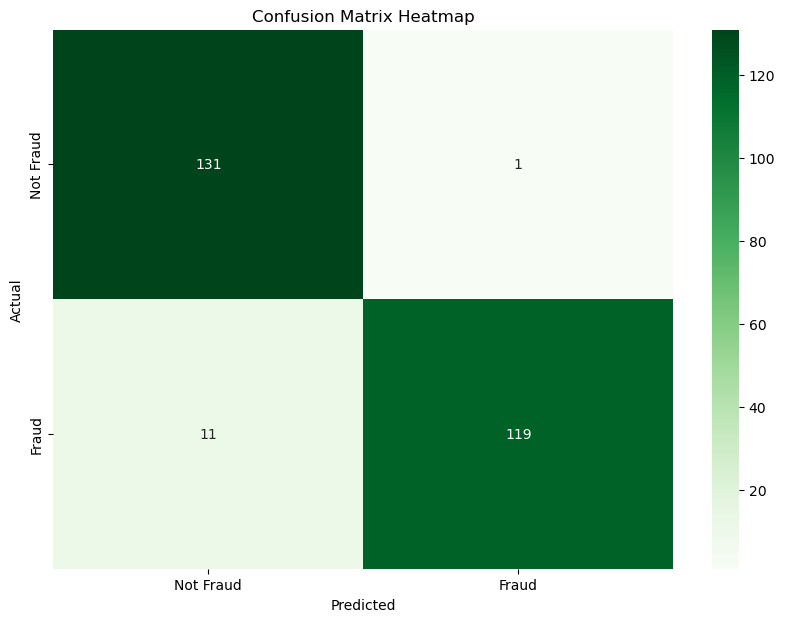

In [49]:
#3rd cofusion matrix
confusion_mat = metrics.confusion_matrix(Y_test,y_pred)
print("Confusion_matrix: ")
print(confusion_mat)
print()
#let us visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat,annot=True,fmt='d',cmap="Greens",xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()